### 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
### Import timeseries files from github https://github.com/CSSEGISandData/COVID-19


In [0]:
import pandas as pd
import numpy as np

#Import timeseries files from github https://github.com/CSSEGISandData/COVID-19
#2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

path_confirmed = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
path_deaths =('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


df_conf = pd.read_csv(path_confirmed)
df_death = pd.read_csv(path_deaths)

df_conf.to_csv (r'Daten/confirmed_cases.csv', index = False, header=True) 
df_death.to_csv (r'Daten/death.csv', index = False, header=True) 


Start Beakerx

In [0]:
import pandas as pd
from pandas import DataFrame

#from beakerx import *
#from beakerx.object import beakerx

df_conf = pd.read_csv('Daten/confirmed_cases.csv')
df_death = pd.read_csv('Daten/death.csv')

df_conf

In [0]:
df_conf[(df_conf['Country/Region']=='Switzerland')]


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
206,NaN,Switzerland,46.8182,8.2275,0,0,0,0,0,0,...,2200,2200,2700,3028,4075,5294,6575,7474,8795,9877


In [0]:
df_error =df_conf[['Country/Region','3/11/20','3/12/20']]
#df_error =df_conf[['Country/Region','3/22/20','3/23/20']]

df_error = df_error[(df_error['3/11/20'] == df_error['3/12/20']) & df_error['3/11/20'] > 0 ]
#df_error = df_error[(df_error['3/22/20'] == df_error['3/23/20']) & df_error['3/22/20'] > 0 ]
df_error.head(100)

,Country/Region,3/11/20,3/12/20
0,Afghanistan,7,7
3,Andorra,1,1
6,Argentina,19,19
9,Australia,65,65
10,Australia,1,1
...,...,...,...
210,Togo,1,1
212,Tunisia,7,7
213,Turkey,1,1
215,Ukraine,1,1


### Unpivot Data and String to Date


In [0]:
#Confirmed Cases
df_conf_unpiv = df_conf.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='date',value_name='cases')
df_conf_unpiv['date']= pd.to_datetime(df_conf_unpiv['date']).dt.strftime('%Y/%m/%d')

#Deaths
df_death_unpiv = df_death.melt(id_vars=['Country/Region','Province/State','Lat','Long'],var_name='date',value_name='deaths')
df_death_unpiv['date']= pd.to_datetime(df_death_unpiv['date']).dt.strftime('%Y/%m/%d')

df_conf_unpiv.head(10)
#df_death_unpiv.head(10)

,Country/Region,Province/State,Lat,Long,date,cases
0,Afghanistan,NaN,33.0000,65.0000,2020/01/22,0
1,Albania,NaN,41.1533,20.1683,2020/01/22,0
2,Algeria,NaN,28.0339,1.6596,2020/01/22,0
3,Andorra,NaN,42.5063,1.5218,2020/01/22,0
4,Angola,NaN,-11.2027,17.8739,2020/01/22,0
5,Antigua and Barbuda,NaN,17.0608,-61.7964,2020/01/22,0
6,Argentina,NaN,-38.4161,-63.6167,2020/01/22,0
7,Armenia,NaN,40.0691,45.0382,2020/01/22,0
8,Australia,Australian Capital Territory,-35.4735,149.0124,2020/01/22,0
9,Australia,New South Wales,-33.8688,151.2093,2020/01/22,0


### Join the confirmed cases with the deaths statistics

In [0]:
df_merge = pd.merge(df_conf_unpiv, df_death_unpiv, left_on=['date','Country/Region','Province/State'], right_on=['date','Country/Region','Province/State'])
df_merge = df_merge.filter(['Country/Region','Province/State','date','cases','deaths'])

df_merge = df_merge.groupby(['Country/Region','date'])['cases','deaths'].sum().reset_index()
df_merge
#df_merge[df_merge['Country/Region']=='US'].tail(10)
                                                    

,Country/Region,date,cases,deaths
0,Afghanistan,2020/01/22,0,0
1,Afghanistan,2020/01/23,0,0
2,Afghanistan,2020/01/24,0,0
3,Afghanistan,2020/01/25,0,0
4,Afghanistan,2020/01/26,0,0
...,...,...,...,...
10705,Zimbabwe,2020/03/20,1,0
10706,Zimbabwe,2020/03/21,3,0
10707,Zimbabwe,2020/03/22,3,0
10708,Zimbabwe,2020/03/23,3,1


### Contries with the most confirmed cases

In [0]:
df_cases=pd.DataFrame(df_merge.groupby('Country/Region')['cases'].max())
df_cases.sort_values(by='cases', ascending=False).head(10)

,cases
Country/Region,
China,81591
Italy,69176
US,53740
Spain,39885
Germany,32986
Iran,24811
France,22622
Switzerland,9877
"Korea, South",9037


### Contries with the most deaths

In [0]:
df_death_max = df_death_unpiv.groupby('Country/Region')['deaths'].max()
pd.DataFrame(df_death_max.sort_values(ascending=False))

,deaths
Country/Region,
Italy,6820
China,3160
Spain,2808
Iran,1934
France,1100
...,...
Fiji,0
Nepal,0
Namibia,0


In [0]:

'''#country_list = ['Austria','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Czech Republic','Denmark','Estonia','Finland','France',
                'Germany','Greece','Hungary','Island','Ireland','Italy','Netherlands','Norway','Noth Macedonia','Norway','Poland','Portugal',
                'Republic of Ireland','Romania','Spain','Slovenia','Slovakia','Sweden','Switzerland','UK']
'''


country_list = ['Italy']
#country_list = ['Korea, South']
#country_list = ['Iran']
#country_list = ['Japan']
#country_list = ['Switzerland']
#country_list = ['Ireland']
#country_list = ['Germany']
#country_list = ['Spain']
#country_list = ['France']
#country_list = ['US']
#country_list = ['United Kingdom']

#country_list = ['China']

df_country = df_merge[df_merge['Country/Region'].isin(country_list)]
df_country = df_country[df_country['cases']>=1]
zeilen= df_country['cases'].count()
df_country['day']= np.arange(1,zeilen+1)
df_country.tail(10)


,Country/Region,date,cases,deaths,day
5093,Italy,2020/03/15,24747,1809,45
5094,Italy,2020/03/16,27980,2158,46
5095,Italy,2020/03/17,31506,2503,47
5096,Italy,2020/03/18,35713,2978,48
5097,Italy,2020/03/19,41035,3405,49
5098,Italy,2020/03/20,47021,4032,50
5099,Italy,2020/03/21,53578,4825,51
5100,Italy,2020/03/22,59138,5476,52
5101,Italy,2020/03/23,63927,6077,53
5102,Italy,2020/03/24,69176,6820,54


### Confirmed Cases plot 

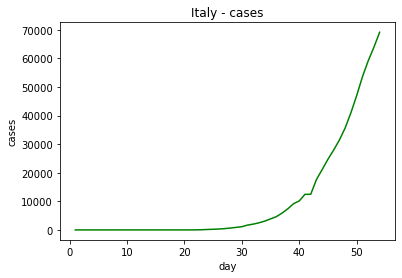

In [0]:
import matplotlib.pyplot as plt
import numpy as np

faelle = 'cases'

plt.plot(df_country['day'],df_country[faelle], color = 'green')
plt.title(' '.join(country_list) + ' - ' + faelle)
plt.xlabel('day')
plt.ylabel(faelle)
plt.show()


,date,day,cases,expected,expected log
47,2020/03/18,47,35713,29524,32019
48,2020/03/19,48,41035,33730,36782
49,2020/03/20,49,47021,38535,41886
50,2020/03/21,50,53578,44025,47259
51,2020/03/22,51,59138,50297,52809
52,2020/03/23,52,63927,57462,58431
53,2020/03/24,53,69176,65648,64014
54,NaN,54,NaN,75000,69451
55,NaN,55,NaN,85685,74645
56,NaN,56,NaN,97892,79518


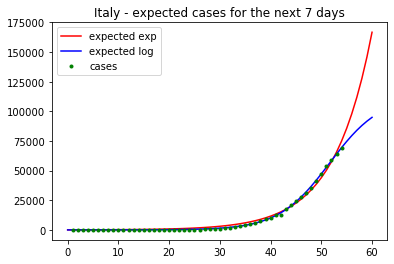

In [0]:

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline


#def exponential(x, a, k, b):
#    return a*np.exp(x*k) + b

def exponential(x,a,b,c):
    return a*np.exp(b*(x-c))

def logistic(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))


faelle = 'cases'

zeilen= df_country[faelle].count()


x_array = df_country['day']
x_date = df_country['date'].values
y_array_exp = df_country[faelle].values

poptE, pcovE  = curve_fit(exponential, x_array, y_array_exp,p0=[1,1,1])
poptL, pcovL  = curve_fit(logistic, x_array, y_array_exp,p0=[2.5,3,0])

# projection of next 7 days
expdays = 7
x_array = np.arange(0, zeilen + expdays)

# plot Chart
plt.figure
plt.plot(x_array, exponential(x_array, *poptE), 'r-',label='expected exp')
plt.plot(x_array, logistic(x_array, *poptL), 'b-',label='expected log')
plt.plot(df_country['day'], y_array_exp ,".", color = 'green',label=faelle  )

plt.title(''.join(country_list) + ' - expected ' + faelle +' for the next ' + str(expdays) + ' days' )
plt.legend()

# table with projections
land_pred = ([x_date,x_array,y_array_exp, exponential(x_array, *poptE).astype('int'),logistic(x_array, *poptL).astype('int')] )
land_pred = pd.DataFrame(land_pred).T

land_pred.columns = (['date','day',faelle,'expected','expected log'])

land_pred.tail(14)



In [0]:
from sklearn.metrics import mean_squared_error

msq_exp = mean_squared_error(y_array_exp,exponential(x_array, *poptE)[:zeilen])
msq_log = mean_squared_error(y_array_exp,logistic(x_array, *poptL)[:zeilen])

print('Exponential model MSE:',msq_exp)
print('Logistic model MSE:',msq_log)



Exponential model MSE: 9722331.654628145
Logistic model MSE: 5467837.81646566
